In [2]:
import pandas as pd
import os

In [4]:
os.listdir("../../data/processed")

all_files_to_consider = [f for f in os.listdir("../../data/processed") if "old" in f or "new" in f]

In [5]:
all_files_to_consider

['wordle_withcritic_new_processed.jsonl',
 'referencegame_new_processed.jsonl',
 'taboo_new_processed.jsonl',
 'wordle_old_processed.jsonl',
 'wordle_withclue_old_processed.jsonl',
 'privateshared_old_processed.jsonl',
 'imagegame_old_processed.jsonl',
 'imagegame_new_processed.jsonl',
 'privateshared_new_processed.jsonl',
 'wordle_withclue_new_processed.jsonl',
 'wordle_new_processed.jsonl',
 'taboo_old_processed.jsonl',
 'referencegame_old_processed.jsonl',
 'wordle_withcritic_old_processed.jsonl']

In [6]:
all_dfs = []
for file in all_files_to_consider:
    path = f"../../data/processed/{file}"
    df = pd.read_json(path, lines=True)
    all_dfs.append(df)


In [8]:
all_game_data = pd.concat(all_dfs)

In [9]:
all_game_data.head()

,game,benchmark_version,game_id,model,experiment,episode,Aborted,Lose,Success,chat,target,player
0,wordle_withcritic,v1.5,1,CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-...,0_high_frequency_words_clue_with_critic,episode_0,1,0,0,"[{'role': 'user', 'content': 'You are a langua...",start,player 1
1,wordle_withcritic,v1.5,2,CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-...,0_high_frequency_words_clue_with_critic,episode_1,1,0,0,"[{'role': 'user', 'content': 'You are a langua...",share,player 1
2,wordle_withcritic,v1.5,3,CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-...,0_high_frequency_words_clue_with_critic,episode_2,1,0,0,"[{'role': 'user', 'content': 'You are a langua...",third,player 1
3,wordle_withcritic,v1.5,4,CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-...,0_high_frequency_words_clue_with_critic,episode_3,1,0,0,"[{'role': 'user', 'content': 'You are a langua...",photo,player 1
4,wordle_withcritic,v1.5,5,CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-...,0_high_frequency_words_clue_with_critic,episode_4,1,0,0,"[{'role': 'user', 'content': 'You are a langua...",might,player 1


In [17]:
all_game_data["bm_version"] = all_game_data.benchmark_version.apply(lambda x: "old" if x in ['v0.9', 'v1.0'] else "new")

In [18]:
len(all_game_data[(all_game_data["Success"] == 1) & (all_game_data["bm_version"] == "old")]), len(all_game_data[(all_game_data["Lose"] == 1)  & (all_game_data["bm_version"] == "old")]), len(all_game_data[(all_game_data["Aborted"] == 1)  & (all_game_data["bm_version"] == "old")])

(3794, 5412, 13044)

In [19]:
len(all_game_data)

114479

In [20]:
len(all_game_data[(all_game_data["Success"] == 1) & (all_game_data["bm_version"] == "new")]), len(all_game_data[(all_game_data["Lose"] == 1)  & (all_game_data["bm_version"] == "new")]), len(all_game_data[(all_game_data["Aborted"] == 1)  & (all_game_data["bm_version"] == "new")])

(27985, 40235, 30149)

In [22]:
len(all_game_data[(all_game_data["bm_version"] == "old")].model.unique())

51

In [23]:
len(all_game_data[(all_game_data["bm_version"] == "new")].model.unique())

88

In [40]:
game_instances_old = []
game_instances_new = []

all_games = ['referencegame', 'taboo', 'imagegame',  'privateshared',  'wordle','wordle_withclue', 'wordle_withcritic', ]

for game in all_games:
    game_instances_old.append(len(all_game_data[(all_game_data.game == game) & (all_game_data["bm_version"] == "old")]))
    game_instances_new.append(len(all_game_data[(all_game_data.game == game) & (all_game_data["bm_version"] == "new")]))

(game_instances_old, game_instances_new)

([4160, 6122, 4160, 2497, 1369, 1376, 2566],
 [45720, 15240, 10160, 6150, 3751, 3760, 7448])

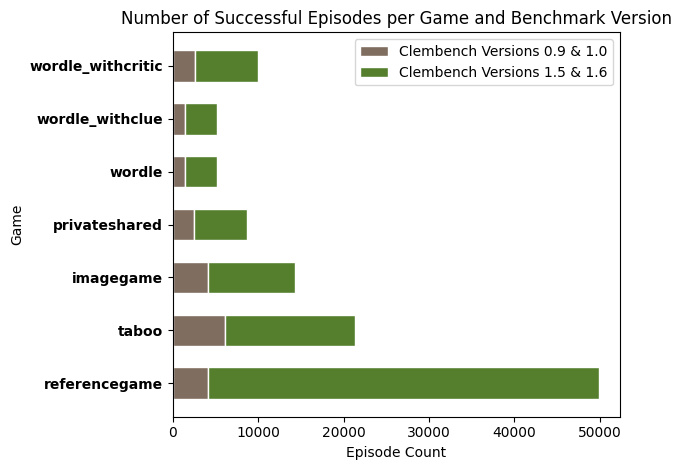

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
categories = all_games
values1 = game_instances_old
values2 = game_instances_new

# Y locations for the groups
y = np.arange(len(categories))
bar_height = 0.6

# Plot the first layer
plt.barh(y, values1, color='#7f6d5f', edgecolor='white', height=bar_height, label='Clembench Versions 0.9 & 1.0')

# Plot the second layer, stacked to the right of the first
plt.barh(y, values2, left=values1, color='#557f2d', edgecolor='white', height=bar_height, label='Clembench Versions 1.5 & 1.6')

# Custom Y axis
plt.yticks(y, categories, fontweight='bold')
plt.ylabel("Game")
plt.xlabel("Episode Count")
plt.title("Number of Successful Episodes per Game and Benchmark Version")
plt.legend()

plt.tight_layout()

plt.savefig("../../plots/final_plots/number_of_successful_episodes_per_game_and_clembench_version.png", bbox_inches="tight")
plt.show()

In [77]:
all_old_success = all_game_data[(all_game_data["Success"] == 1) & (all_game_data["bm_version"] == "old")][['game', 'bm_version', 'experiment','episode', "Success"]]
all_new_success = all_game_data[(all_game_data["Success"] == 1) & (all_game_data["bm_version"] == "new")][['game', 'bm_version', 'experiment','episode', "Success"]]

In [87]:
df_counts = all_old_success.groupby(['game', 'bm_version', 'experiment', "episode"])
new_df_counts = all_new_success.groupby(['game', 'bm_version', 'experiment', "episode"])

In [88]:
lt = df_counts.Success.sum().groupby(['game']).mean().to_latex()
lt_new = new_df_counts.Success.sum().groupby(['game']).mean().to_latex()

print(lt_new)

\begin{tabular}{lr}
\toprule
 & Success \\
game &  \\
\midrule
imagegame & 13.900000 \\
privateshared & 5.756757 \\
referencegame & 105.344444 \\
taboo & 101.533333 \\
wordle & 7.000000 \\
wordle_withclue & 26.592593 \\
wordle_withcritic & 41.366667 \\
\bottomrule
\end{tabular}



In [83]:
type(df_counts)

pandas.core.groupby.generic.DataFrameGroupBy